#1. 데이터 읽기

##1.1 데이터 읽기

In [2]:
import sklearn.datasets as datasets
cancer = datasets.load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

##1.2 판다스 변환
> 모델을 만들 data와 label을 dataFrame으로 만들 것이다. data는 cancer의 data를 label은 target을 이용하여 dataframe을 생성하시오

In [13]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


#2. 데이터 전처리

In [ ]:
df.info()

> 데이터가 어떻게 나타나는지 확인

In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


> 수치 데이터에 대한 이상치 확인

In [17]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

> 결과에 대한 분포 확인

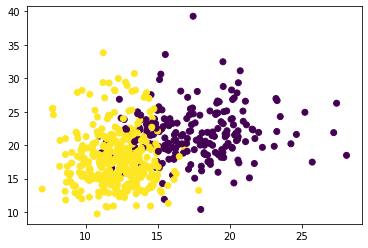

In [25]:
import matplotlib.pyplot as plt

plt.scatter(np.array(df)[:, 0], np.array(df)[:,1], c=df['label'])
plt.show()

> 간단하게 'mean radius'를x축으로, 'mean texture'를 t축으로 지정하고 데이터의 분포를 확인해 보았다. 두 데이터를 하나의 직선으로 구분이 가능하게 보여 선형 분류를 진행할 예쩡이다.

#3. SVM 선형 분리 모델 만들기

##3.1 모델 클래스 로드

In [28]:
import sklearn.svm as svm

svm_clf = svm.SVC(kernel= 'linear')

##3.2 데이터 분리
> 학습 데이터와 검증 데이터를 7:3 비율로 생성하시오

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[0:, :-1], df['label'], test_size=0.3, random_state=62)
print(len(X_train), len(X_test))

398 171


##3.3 모델 생성 및 정확도
> 학습 데이터로 모델을 생성하고 검증 데이터로 정확도를 확인하시오

In [33]:
from sklearn.metrics import accuracy_score
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)

print(accuracy_score(y_test, pred))

0.9122807017543859


#4. Scaling

##4.1 표준화
> 위의 데이터를 이용하여 표준화 후 모델을 만들고 성능평가를 진행하시오

###StandardScaler
> StandardScaler는 표준화를 쉽게 해주는 클래스이다. 이 클래스를 사용하는 목적은 서포트 벡터 머신(Support Vector Machine), 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regresstion) 알고리즘은 가우시안 분포를 가지고 있다는 가정하에 구현되었기 때문에 사전에 표준화를 적용하는 것이 예측 성능 향상에 중요한 요소가 될 수 있다.

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit(df.iloc[0:, :-1]).transform(df.iloc[0:, :-1])
standard_scaled = pd.DataFrame(data=scaled_data, columns=cancer.feature_names)
standard_scaled.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


> Standard Scaler로 표준화를 적용한 데이터로 모델을 만들고 성능평가

In [54]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svm_clf = svm.SVC(kernel= 'linear')
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df['label'], test_size=0.3, random_state=62)
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)

print(accuracy_score(y_test, pred))

0.9590643274853801


- 표준화 하기전 : 0.9122807017543859
- 표준화 진행 후 : 0.9590643274853801

> 로 성능이 오른 것을 확인할 수 있다.

##4.2 정규화
> 위의 데이터를 이용하여 정규화 후 모델을 만들고 성능평가를 진행하시오

### MinMaxScaler
> 데이터를 0~1 사이의 값으로 변환한다.

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_scaled = scaler.fit(standard_scaled).transform(standard_scaled)
df_minmax_scaled = pd.DataFrame(minmax_scaled, columns=cancer.feature_names)
#test = scaler.fit(df.iloc[0:, :-1]).transform(df.iloc[0:, :-1])

X_train, X_test, y_train, y_test = train_test_split(df_minmax_scaled, df['label'], test_size=0.3, random_state=62)

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9415204678362573


> StandardScaler로 표준화 한 값을 MinMaxScaler로 정규화 한 다음 예측을 진행했다. 

> 표준화의 예측률( 0.9590643274853801)보다 조금 낮은 예측률(0.9415204678362573)을 보였다.

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test = scaler.fit(df.iloc[0:, :-1]).transform(df.iloc[0:, :-1])

X_train, X_test, y_train, y_test = train_test_split(test, df['label'], test_size=0.3, random_state=62)

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9415204678362573


> 실험으로 표준화하지 않은 원본 데이터를 minmaxscaler해봤더니 아까 표준화 한 값을 정규화 한 값과 똑같이 나왔다.

#5. 교차 검증
> scoring에서 표준화된 데이터의 점수가 더 좋게 나타낫다. 표준화에서 사용된 standard_scaled를 이용하여 교차검증을 구현하시오

### cross_val_score()
>sklearn에서 지원해주는 교차검증 API이다.
- cross_val_score(estimator, X, y=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
 - estimator : 분류 알고리즘(Classifier) 또는 회귀 알고리즘(Regressor)
 - X : feature dataset
 - y : label dataset
 - scoring : 예측 성능 평가 지표
 - cv : 교차 검증 폴드 수

> 분류 알고리즘이 입력되면 Stratified K Fold를 회귀 알고리즘이 입력되면 K Fold로 분할한다

In [60]:
from sklearn.model_selection import cross_val_score, cross_validate
import sklearn.svm as svm

svm_clf = svm.SVC(kernel= 'linear')
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df['label'], test_size=0.3, random_state=62)

scores = cross_val_score(svm_clf, standard_scaled, df['label'], cv=5, scoring='accuracy')
print('scores = ', scores)
print('mean = ', round(scores.mean(), 5))

scores =  [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
mean =  0.97014


> cross_val_score 함수를 이용하여 간단하게 교차 검증을 진행하였다. 기존 모델인 SVM에 표준화 데이터인 standard_scaled를 적용하여 조금 더 성능이 향상된 모델을 만들 수 있다는 것을 확인했다.

In [61]:
df_cross = pd.DataFrame(cross_validate(svm_clf, standard_scaled, df['label'], cv=5))
print(df_cross)
print(scores.mean())

   fit_time  score_time  test_score
0  0.010189    0.002216    0.956140
1  0.004687    0.001292    0.982456
2  0.004884    0.001238    0.964912
3  0.004040    0.001142    0.964912
4  0.004254    0.001134    0.982301
0.9701443875174661


> cross_validate 함수는 성능 평가 뿐만이 아니라, 학습시간, 평가시간등의 조금 더 많은 정보를 얻을 수 있다.

> 평균 점수 확인 결과 이전보다 높은 평가가 나왔음으로, 더 나은 하이퍼 파라미터를 통해 더 좋은 성능의 모델을 만들어 보자.}

#6. 하이퍼 파라미터
> 위의 결과를 기반으로 하이퍼 파라미터를 구해 보자. 현재 사용되는 kernel은 linear임으로 cost인 'c'를 이용해서 값을 얻으면 된다. C의 범위는 다음과 같이 적용시킨다. 
- [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]


In [74]:
from sklearn.model_selection import GridSearchCV
def get_best_params(C_list):
  svm_clf = svm.SVC(kernel='linear')
  X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df['label'], test_size=0.3, random_state=62)

  params = {
    'C' : C_list
  }
  grid_cv = GridSearchCV(svm_clf, param_grid=params, cv=5, verbose=1)

  grid_cv.fit(X_train, y_train)
  df_scores = pd.DataFrame(grid_cv.cv_results_)

  test = '''
  ========================================================
  최고의 점수 : {}
  최적의 파라미터 : {}
  ========================================================
  '''.format(grid_cv.best_score_, grid_cv.best_params_)
  print(test)
  return df_scores[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

In [76]:
C_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
get_best_params(C_list)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



  최고의 점수 : 0.9824367088607595
  최적의 파라미터 : {'C': 0.1}
  


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


,params,mean_test_score,std_test_score,rank_test_score
0,{'C': 0.001},0.937152,0.022682,8
1,{'C': 0.01},0.969842,0.023407,7
2,{'C': 0.1},0.982437,0.018734,1
3,{'C': 1},0.979905,0.012754,3
4,{'C': 10},0.979937,0.016975,2
5,{'C': 25},0.977437,0.014589,4
6,{'C': 50},0.977437,0.014589,4
7,{'C': 100},0.977437,0.014589,4


In [77]:
C_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
get_best_params(C_list)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



  최고의 점수 : 0.9849367088607595
  최적의 파라미터 : {'C': 0.11}
  


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


,params,mean_test_score,std_test_score,rank_test_score
0,{'C': 0.01},0.969842,0.023407,20
1,{'C': 0.02},0.974873,0.022503,19
2,{'C': 0.03},0.977373,0.020175,18
3,{'C': 0.04},0.977405,0.020072,15
4,{'C': 0.05},0.977405,0.020072,15
5,{'C': 0.06},0.977405,0.020072,15
6,{'C': 0.07},0.979905,0.020393,4
7,{'C': 0.08},0.979905,0.020393,4
8,{'C': 0.09},0.982437,0.018734,2
9,{'C': 0.1},0.982437,0.018734,2


In [82]:
nums = list(range(1, 2001, 1))

for i in range(len(nums)):
  nums[i] = nums[i]/100

get_best_params(nums)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



  최고의 점수 : 0.9849367088607595
  최적의 파라미터 : {'C': 0.11}
  


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   51.9s finished


,params,mean_test_score,std_test_score,rank_test_score
0,{'C': 0.01},0.969842,0.023407,2000
1,{'C': 0.02},0.974873,0.022503,1423
2,{'C': 0.03},0.977373,0.020175,1293
3,{'C': 0.04},0.977405,0.020072,1161
4,{'C': 0.05},0.977405,0.020072,1161
...,...,...,...,...
1995,{'C': 19.96},0.977437,0.014589,442
1996,{'C': 19.97},0.977437,0.014589,442
1997,{'C': 19.98},0.977437,0.014589,442
1998,{'C': 19.99},0.977437,0.014589,442


> 결국 최적의 파라미터는 C = 0.11일때로 나타났다.

#7. 최적의 파라미터를 통한 결과 확인

In [89]:
from sklearn.model_selection import train_test_split
import sklearn.svm as svm

svm_clf = svm.SVC(kernel='linear', C=0.11)
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df['label'], test_size=0.3, random_state=62)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)

print(accuracy_score(pred, y_test))

0.9590643274853801
